# Chapter 6: Decision Trees

- Decision trees can perform both classification and regression tasks and even multioutput tasks   
- Decision trees are fundamental components of Random Forests   
- Called white box models since they are easy to interpret

# 1. Classification

Decision Trees require very little data preparation. They dont't require feature scaling or centering.

In [27]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(max_depth=2)

# 2. Purity Computation

## 2.1 Gini Impurity

A node's gini attribute measures its impurity.   
- Gini = 0 means that the node is pure. All training instances belong to the same class.    
$G_{i} = 1 - \sum_{k=1}^n p_{i,k}^2$    
where $p_{i,k}$ is the ratio of class k instances among the training instances in the $i^{th}$ node


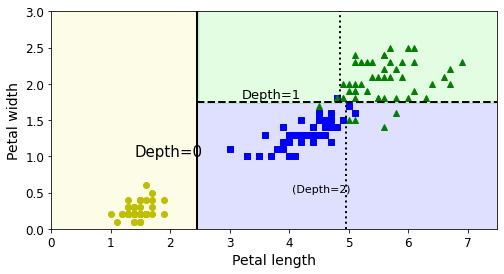

In [29]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

The decision boundary of the root note is at petal length = 2.45cm. Since the lefthand area is pure, it cannot be split any further. The righthand area is impure so the node splits it at petal width = 1.75cm

## 2.2 Gini Impurity V.S Entropy

- Gini index is slightly faster to compute so it is a good default
- When they differ, Gini impurity tends to isolate the most frequent class in its own branch of the tree

# 3. Estimating Class Probabilities

First, the decision tree traverses the tree to find the leaf node for a particular instance. Then it returns the rati of training instances of class k in this node. 
For example, our instance is petal length = 5cm, petal width = 1.5cm.

In [31]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [32]:
tree_clf.predict([[5, 1.5]])

array([1])

# 3. Algorithm

![cart](images/decision_tree.png)

### 3.1 CART Algorithm (Uses Gini Index as attribute selection measure)

Scikit-Learn uses the CART algorithm which produces only binary trees (two children). The algorithm works as follows:  
- First split the training set into two subsets using a single feature $k$ and a threshold $t_{k}$. For example: petal length <= 2.45cm  

How does it choose $k$ and $t_{k}$?   
- It searches for the pair $(k, t_{k})$ that produces the purest subsets (weighted by their size). The cost function that the algorithm tries to minimize is given below:   
$J(k, t_{k})$ = $\frac{m_{left}}{m} G_{left}$ + $\frac{m_{right}}{m} G_{right}$   where   
- $G_{left/right}$ measures the impurity of the left/right subset    
- $m_{left/right}$ is the number of instances in the left/right subset

Once the CART algorithm has successfully split the training set in two, it splits the subsets using the same logic, then the sub-subsets and so on recursively.  
It stops once it reaches the maximum depth (max_depth) or if it cannot find a split that will reduce impurty.

CART algorithm is a greedy algorithm   
- It greedily searches for an optimum split at the top level, then repeats the process at each subsequent level.  
- It does not check whether or not the split wil lead to the lowest possible impurity several levels down.  
- A greedy algorithm often produces a solution that is reasonably good but not guaranteed to be optimal.

### 3.2 ID3 Algorithm (Uses Information Gain as attribute selection measure)

ID3 algorithm can produce Decision Trees with nodes that have more than two children.

# 4. Computational Complexity

- Traversing the Decision Trees requires going through roughly $O(log_{2}(m))$ nodes. 
- Since each node only requires checking the value of the one feature, the overall prediction is $O(log_{2}(m))$, indepedent on the number of features. As a result, prediction is fast, even when dealing with large training sets.

# 5. Regression

In [35]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [36]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2)

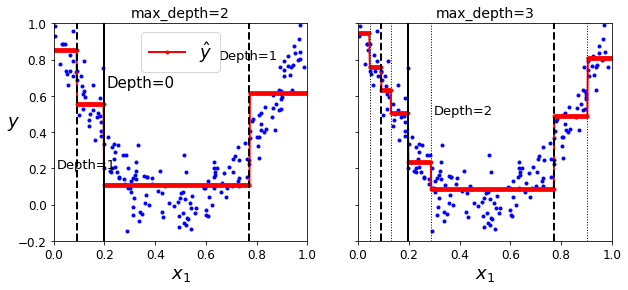

In [37]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.sca(axes[1])
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

- The prediction is the average target vallue of the 110 training instances associated with a leaf node.  
- The algorithm splits each region in a way that makes most training instances as close as possible to the predicted value
- Instead of trying to split the training set in a way that minimizes impurity, it not tries to split the training set in a way that minimizes the MSE. The cost function that the algorithm tries to minimize is given below:  

$J(k, t_{k})$ = $\frac{m_{left}}{m}MSE_{left} + \frac{m_{right}}{m}MSE_{right}$ where   

$MSE_{node}$ = $\sum_{i \in node}(\hat{y_{node}} - y^{(i)})^{2}$ 

$\hat{y_{node}} = \frac{1}{m_{node}} \sum_{i \in  node} y^{(i)}$

- Decision Trees are prone to overfitting when dealing with regression tasks as well.

# 8. Limitations

## 8.1 Overfitting

- Decision Trees make very few assumptions about the training data. If left unconstrained, the tree structure will adapt itself to the training data and overfit.
- Such model is called nonparametric model because the number of parameters are not determined prior to training so the model structure is free to stick closely to the data.
- Parametric model have pre-determined number of parameters hence the df is limited. This reduces the risk of overfitting.

To avoid overfitting, we need to restrict the degree of freedom during training --> Regularization  
- max_depth (maximum depth)
- min_samples_split (min number of samples a node must have before it can split)
- min_samples_leaf (min number of samples a leaf node ust have)
- min_weight_fraction_leaf (same as min_samples_leaf but expressed as fraction of total num of weighted instances)
- max_leaf_nodes (max number of leaf nodes)
- max_features

## 8.2. Pruning

Train the decision tree without restritcions, then pruning (deleting) unnecessary nodes. A node whose children are all leaf nodes is considered unnecessary if:   
- Purity improvement it provides is not statistically significant. Statistical test such as chi-squared test are used to estimate the probability that the improvement is purely the result of chance (null hypothesis).

## 8.3 Instability (High Variance)

Decision Tree love orthogonal decision boundaries (all splits are perpendicular to the axis), which makes them sensitive to training set rotation.

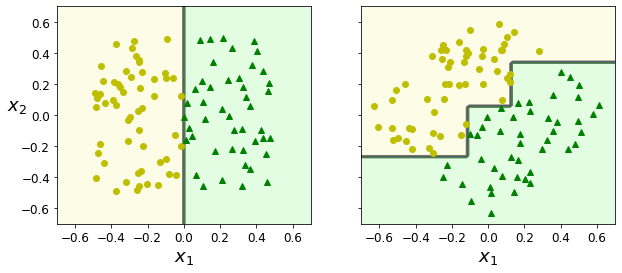

In [38]:
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.sca(axes[1])
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.ylabel("")

plt.show()

When rotated, the decision boundary looks unnecessary convoluted. To limit this problem, we can use PCA which often leads to better orientation of the training data.

Main issue with Decision Trees is that they are very sensitive to small variations in the training data. If we remove the widest Iris Veriscolor from the training set, we get a different model. Since the training algorithm used by Scikit-Learn is stochastic, (randomly selects the set of features to evaluate at each node), we may get very different models even on the same training data unless we set random_state.

Random Forests can limit this instability by averaging predictions over many trees

# Exercises

**What is the approximate depth of a Decision Tree trained (without restrictions) on a training set with one million instances**

The depth of a well-balanced binary tree containing m leaves is equal to $log_{2}(m)^{2}$, rounded up. If the training set contains one million instances, the Decision Tree will have a depth of $log_{2}(10^{6}) \approx  20$

**Is a node's Gini impurity generally lower or greater than its parent's? Is it generally lower/greater or always lower/greater?**

A node's Gini impurity is generally lower than its parent's due tothe CART training algorithm's cost function, which splits each node in a way that minimizes the weighted sum of its childen's Gini impurities.

**If a Decision Tree is overfitting the training set, is it a good idea to try decreasing max_depth?**

May be a good idea to decreas max_depth since this will constrain the model, regularizing it

**If a Decision Tree is underfitting the training set, is it a good idea to try scaling the input features?**

Decision Tree don't care whether or not the training data is scaled or centered.

**If it takes one hour to train a Decision Tree on a training set containing 1 million instances, roughly how much time will it take to train another Decision Tree on a training set containing 10 million instances?**

The computational complexity of training a Decision Tree is $O(n$ x $mlog(m))$.   
$K = (n$ x $10m$ x $log(10m)) / (n$ x $m log(m))$

**If you training set contains 100,000 instances, will setting presort=True speed up training?**

Presorting the training set speeds up training only if the dataset is smaller than a few thousand instances. If it contains 100,000 instances, setting presort=True will slow down training instead.